In [1]:
import pandas as pd
import numpy as np
import random
from os import listdir
from os.path import isfile, join,getsize,isdir
import csv
import numpy
import cPickle as pickle
import json
from random import shuffle
import warnings
import time
#import msgpack
import re
import matplotlib.pyplot as plt
from datetime import date
import math
import pylab
import pandas_profiling
import unicodedata
import dateutil.relativedelta
#n'affiche pas les warnings
warnings.filterwarnings('ignore')
#affiche la totalité des colonnes du dataframe
pd.set_option('display.max_columns', None)
#path = "C:\Users\Data Science 5\Desktop\L_equipe"

## Apprentissage

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV

path = "W:\L_equipe\dataframes\\"
dftrain = pd.read_pickle(path+"\dataframe_ready_to_use.pkl")
#shuffle dataframe
dftrain.iloc[np.random.permutation(len(dftrain))]

X = dftrain.copy()
X.drop("abo_juin", axis=1, inplace=True)
Y = dftrain.abo_juin

### Grid Search

In [3]:
#tuned_parameters = {"n_estimators" : [100],
#                  "max_depth": [3,10,15,20],
#                  #"random_state" : [None],
#                   #"min_samples_leaf": [15, 16, 17],
#                  "bootstrap": [True, False]}
#
#model = RandomForestClassifier(n_jobs=-1)

tuned_parameters = {"n_estimators" : [5],
                  "max_depth": [10,20],
                  #"random_state" : [None],
                   "min_samples_leaf": [15, 16, 17],
                    "oob_score" : [True, False],
                  "bootstrap": [True]}

model = ExtraTreesClassifier(n_jobs=-1)

gs = GridSearchCV(model, tuned_parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
gs.fit(X, Y)

minavgscore = 10000
minparams = 0

for params, avgscore, scores in gs.grid_scores_ :
    if avgscore < minavgscore :
        minavgscore = avgscore
        minparams = params

print minavgscore, minparams

0.906015037594 {'n_estimators': 5, 'oob_score': False, 'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 17}


In [4]:
# -- Random Forest
#model = RandomForestClassifier(n_estimators=100,n_jobs=-1, max_depth=3, bootstrap=True)

# -- ExtraTrees
model = ExtraTreesClassifier(n_estimators=5000, max_depth = 10, bootstrap=True, oob_score=True, n_jobs=-1)

%time model.fit(X,Y)

Wall time: 22 s


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=10, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

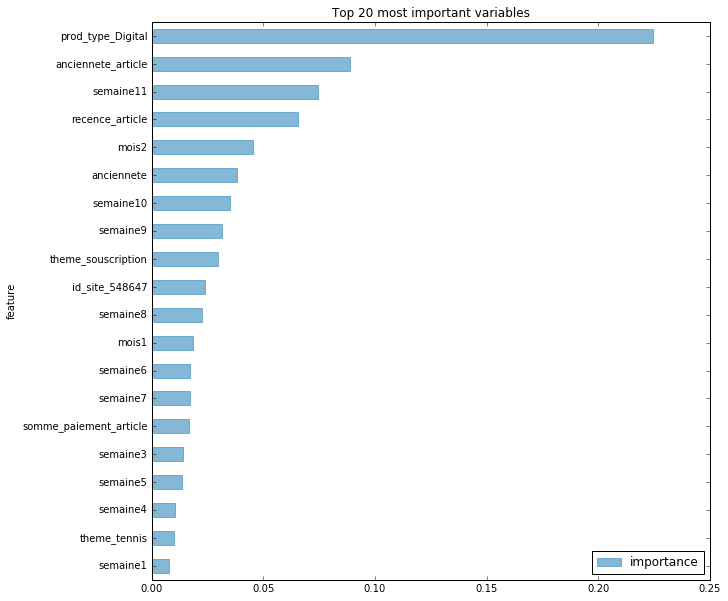

In [5]:
%matplotlib inline

feature_importances_data = []
features = X.columns
for feature_name, feature_importance in zip(features, model.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort('importance')[-20::]\
    .plot(title='Top 20 most important variables',
          kind='barh',
          figsize=(10, 10),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)